In [1]:
import numpy as np
from scipy.cluster import vq
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Validation Density

In [2]:
target,prediction = [],[]
for i in range(1,41):
    data = np.load(f'test/feeding_target_results_{1000+i}.npz')
    target.append(data['target'])
    prediction.append(data['prediction'])
target = np.concatenate(target)
prediction = np.concatenate(prediction)

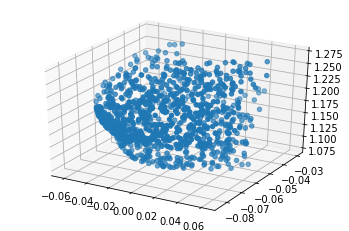

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*target),color='tab:blue')

In [5]:
dist = norm(prediction-target[:,np.newaxis,:],axis=2)
dist /= .132

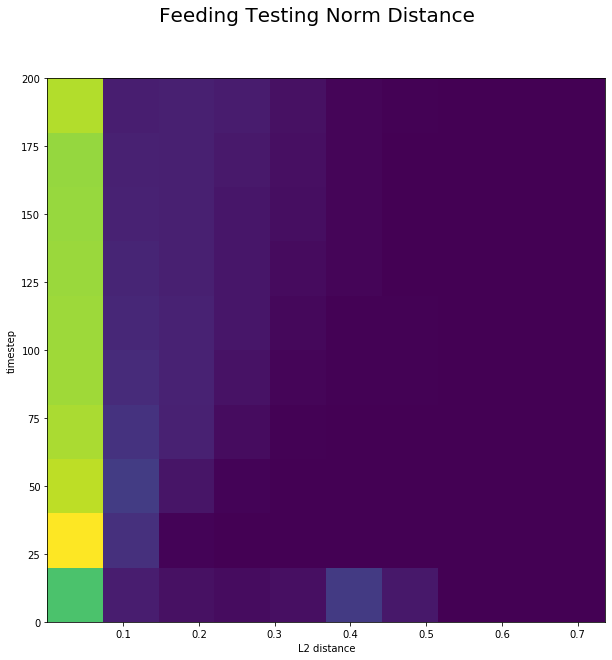

In [6]:
fig = plt.figure(figsize=(10,10))
hist0,xedges0,yedges0 = np.histogram2d(dist.flatten(),list(range(201))*len(dist))
extent0 = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
plt.imshow(hist0.T, extent=extent0, origin='lower',aspect='auto')
plt.suptitle("Feeding Testing Norm Distance",fontsize=20)
plt.ylabel("timestep")
plt.xlabel("L2 distance")

plt.show()

# Training Density

In [22]:
import os
parent = os.path.dirname(os.path.abspath(''))
obs,targets = np.load(os.path.join(parent,"data","feeding","noised_trajectory.npz")).values()
del obs

In [23]:
prediction = np.load(os.path.join(parent,"data","feeding","prediction.npy"))

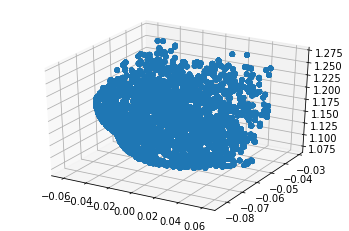

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*targets),color='tab:blue')

In [25]:
distances = norm(prediction-targets[:,np.newaxis,:],axis=2)

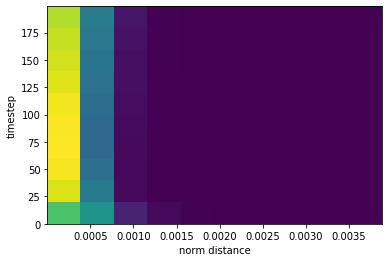

In [26]:
hist0,xedges0,yedges0 = np.histogram2d(distances.flatten(),list(range(200))*len(distances))
extent0 = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
plt.imshow(hist0.T, extent=extent0, origin='lower',aspect='auto')
plt.xlabel("norm distance")
plt.ylabel("timestep")

plt.show()

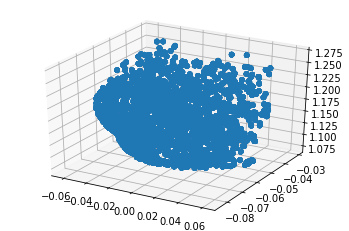

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*prediction[:,-1,:]),color='tab:blue')

[262.903708     6.96180268   2.65534228]
[1.07621788 1.09526347 1.11430907 1.13335466 1.15240025 1.17144585
 1.19049144 1.20953704 1.22858263 1.24762823 1.26667382]


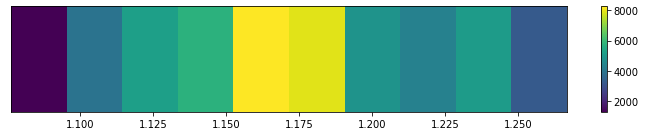

In [30]:
s,d,vt = np.linalg.svd(prediction[:,100,:],full_matrices=False)
print(d)

# plt.scatter(s.T[1]*d[1],s.T[0]*d[0])

heat,edges = np.histogram(s.T[0]*d[0])
print(edges)
extent = [edges[0],edges[-1],0,1]
plt.rcParams["figure.figsize"] = 10,2
plt.imshow(heat[np.newaxis,:],extent=extent,aspect='auto')
plt.yticks([])
plt.tight_layout()
plt.colorbar()